In [13]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "../../dataset/cri_compustat_merged_v8.pkl"

# Open the pickle file for reading
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    df = pickle.load(file)

df.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,197946.597222,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,190.722132,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.000000,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,269.176235,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,0.000000,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002


In [3]:
# Create two separate DataFrames based on the 'default' values
df = df.dropna()
default_0_data = df[df['Default'] == 0]
default_1_data = df[df['Default'] == 1]

In [4]:
default_0_data.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,197946.597222,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,190.722132,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.000000,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,269.176235,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,0.000000,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002


In [5]:
default_1_data.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
276,29230,2000.0,1,0.089239,0.011089,0.673290,-0.540598,-1.172139,-0.340881,-0.001430,...,13.803158,-0.505253,-0.255848,-0.0,1.0,11.106801,-85.374706,-81.606871,-0.356514,0.210021
364,30348,2000.0,1,0.089239,0.011089,1.295039,0.243070,1.057134,-0.297336,-0.015092,...,4.782004,1.883376,-0.007620,-0.0,1.0,-12.765445,-204.380731,-136.120493,-2.076986,-2.887282
478,27923,2000.0,1,0.089239,0.011089,1.346388,-0.536663,-0.202845,-0.131161,-0.005771,...,165.024842,-1.096040,-0.392512,-0.0,1.0,21.589883,-66.305330,-60.343270,-5.872000,22.333333
701,33223,2000.0,1,0.089239,0.011089,0.275348,-1.141033,0.729906,-0.872299,0.000817,...,460.150307,-1.156792,-0.032672,-0.0,1.0,-27.180854,-173.635696,-68.806986,-0.701344,-4.021419
1132,48005,2000.0,1,0.313050,0.007314,2.526367,-1.034270,0.685505,-0.167793,-0.015729,...,11.304757,-0.340977,-2.343333,-0.0,1.0,23.596851,-62.885010,-56.630732,-0.202496,1.972534


In [6]:
print(default_0_data.columns.tolist())


['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin', 'debt_service_coverage_ratio', 'interest_coverage_ratio']


In [7]:
selected_features = ['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 
                    'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 
                    'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Duration', 'current_ratio', 
                    'quick_ratio', 'cash_ratio', 'net_working_capital', 
                    'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 
                    'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 
                    'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 
                    'operating_profit_margin', 'ebitda_margin', 'debt_service_coverage_ratio', 'interest_coverage_ratio']

In [8]:
default_0_data[selected_features].describe()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
count,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,...,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06,1.170092e+06
mean,5.306773e-02,-3.977857e-03,4.212570e+00,-2.956696e-02,6.596430e-01,-1.192812e-02,-4.352158e-03,-1.173512e-04,4.105614e-01,-3.313211e-02,...,-2.068100e+04,1.021723e+00,5.868416e+01,2.303788e-01,-1.702679e+00,-5.460871e+04,-8.771577e+05,-8.624627e+05,-2.220711e+04,-1.872014e+04
std,1.788812e-01,7.658808e-03,2.978853e+00,1.227940e+00,8.332287e-01,2.898132e-01,3.659536e-02,3.060736e-02,2.087028e+00,3.296425e-01,...,1.771278e+06,3.084094e+02,4.100505e+02,3.236207e+00,5.362328e+01,5.312093e+05,4.291554e+06,4.252679e+06,5.303371e+04,7.233339e+04
min,-5.455788e-01,-1.209741e-02,-1.113511e+00,-3.534109e+01,-4.156714e+00,-2.559415e+00,-1.324832e+00,-6.009485e-01,-6.176606e+00,-1.923094e+00,...,-2.711250e+07,-6.403037e+04,-6.666667e+04,-7.477360e+02,-1.149000e+03,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.490411e+05,-2.972110e+05
25%,-5.310490e-02,-1.095465e-02,2.193817e+00,-6.031218e-01,0.000000e+00,-8.294516e-02,-3.245306e-03,-2.110281e-03,-1.075910e+00,-1.829846e-01,...,0.000000e+00,1.368799e-02,-1.100000e+01,0.000000e+00,7.948718e-01,1.959101e+01,-7.813218e+01,-7.320695e+01,-4.044804e+00,3.449270e-01
50%,8.364726e-02,-6.738806e-03,3.657664e+00,-9.136743e-03,5.469286e-01,0.000000e+00,1.812131e-03,2.724481e-06,3.504435e-01,-2.490568e-02,...,1.035785e+02,5.726804e-01,4.396552e+01,-0.000000e+00,1.000000e+00,3.555241e+01,-5.405017e+01,-4.795729e+01,-6.173469e-01,4.243000e+00
75%,1.489924e-01,1.361954e-03,5.618081e+00,5.809080e-01,1.119618e+00,6.460046e-02,5.588279e-03,2.230067e-03,1.803674e+00,1.282352e-01,...,2.426768e+02,1.451249e+00,9.030380e+01,2.050475e-01,1.000000e+00,5.484830e+01,-2.546636e+01,-1.477772e+01,-9.597024e-02,1.319851e+01
max,7.133805e-01,1.386113e-02,1.146545e+02,1.493372e+01,4.787727e+00,2.683886e+00,2.160935e-01,6.366733e-01,6.752074e+00,2.018934e+00,...,9.736054e+08,1.096772e+05,4.137500e+04,7.650000e+02,7.487360e+02,8.017000e+05,1.603300e+06,1.582700e+06,5.576667e+03,1.326735e+05


In [9]:
default_1_data[selected_features].describe()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
count,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,...,9.322000e+03,9322.000000,9322.000000,9322.000000,9322.000000,9.322000e+03,9.322000e+03,9.322000e+03,9322.000000,9322.000000
mean,0.001974,-0.002959,1.005284,-0.542584,0.318233,-0.148920,-0.021627,-0.008378,-0.824580,-0.555999,...,-4.874652e+04,1.509753,-1.820060,-0.007588,1.007588,-2.135029e+04,-5.819154e+05,-5.714741e+05,-5231.549611,-5610.369752
std,0.174277,0.008080,1.224642,0.678231,0.729705,0.421527,0.046005,0.049288,1.672617,0.565888,...,1.156971e+06,49.753458,133.639262,1.207083,1.207083,3.313499e+05,3.517804e+06,3.484098e+06,27224.867636,40365.795386
min,-0.545579,-0.012097,-1.113511,-8.662227,-3.088424,-2.559415,-1.160677,-0.600948,-5.739824,-1.923094,...,-2.711250e+07,-830.780488,-3503.000000,-50.000000,-49.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
25%,-0.129716,-0.010462,0.189439,-0.903751,-0.064291,-0.272591,-0.024967,-0.008896,-1.953690,-0.886387,...,0.000000e+00,-0.590276,-7.609756,0.000000,1.000000,6.323424e+00,-1.241855e+02,-1.033979e+02,-0.997512,-3.388495
50%,0.042469,-0.004912,0.838951,-0.500132,0.296004,-0.065992,-0.009384,-0.001075,-0.961820,-0.502261,...,1.010359e+02,0.220415,-2.351852,-0.000000,1.000000,2.188719e+01,-8.174262e+01,-7.167047e+01,-0.344647,0.162863
75%,0.129957,0.002831,1.598153,-0.131433,0.714748,0.023220,-0.002346,0.003422,0.190965,-0.182875,...,2.909803e+02,1.478634,-0.375000,0.000000,1.000000,4.162031e+01,-5.811265e+01,-4.347740e+01,-0.101669,1.760953
max,0.634633,0.013861,10.619884,4.041032,3.107368,2.683886,0.089197,0.602387,5.945415,2.018934,...,9.143250e+05,2264.928571,3817.000000,50.000000,51.000000,1.112741e+04,1.227222e+05,1.196111e+05,37.498219,4870.000000


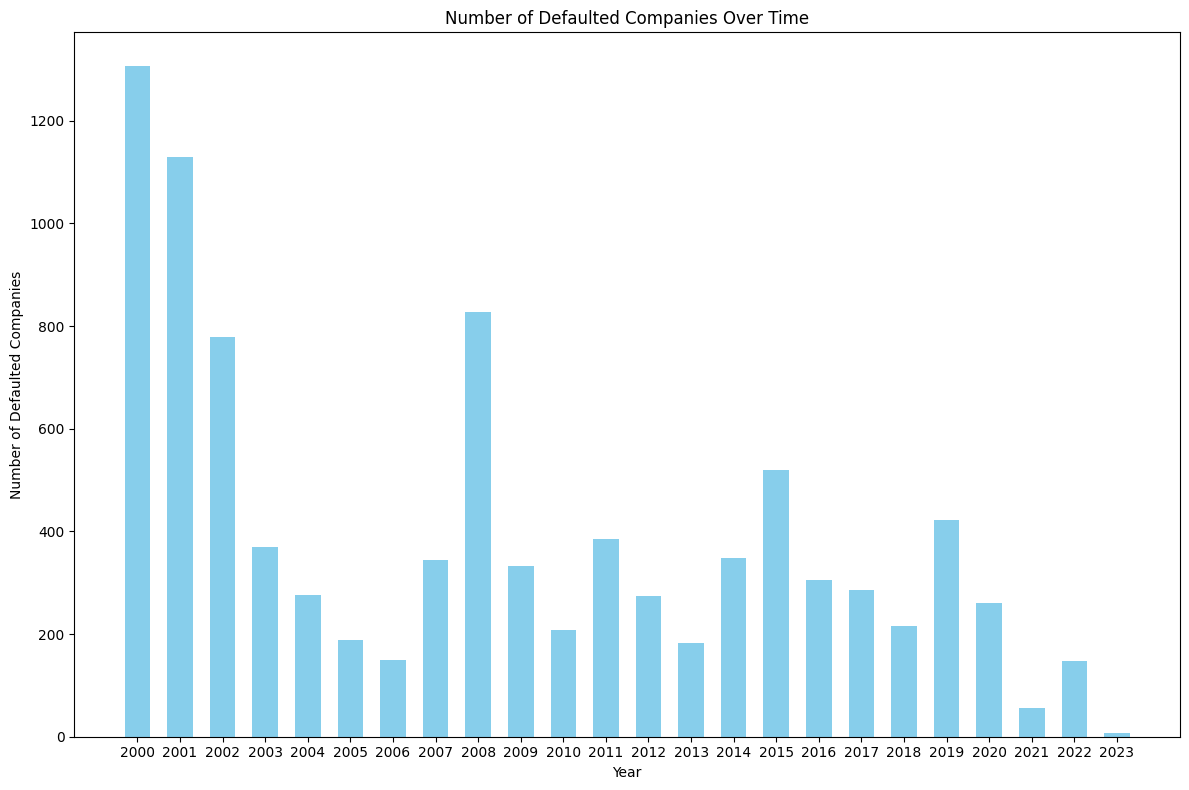

In [10]:
company_count_by_year = default_1_data['year'].value_counts().reset_index()
company_count_by_year.columns = ['year', 'CompNo']
company_count_by_year = company_count_by_year.sort_values(by='year')

plt.figure(figsize=(12, 8))

# Adjust the width of the bars for more space
bar_width = 0.6

# Increase the space between the bars by adjusting the position
positions = company_count_by_year['year']

plt.bar(positions, company_count_by_year['CompNo'], width=bar_width, color='skyblue')

plt.xlabel('Year')
plt.ylabel('Number of Defaulted Companies')
plt.title('Number of Defaulted Companies Over Time')

# Adjust the x-axis ticks for better spacing
plt.xticks(positions)

plt.tight_layout()

plt.show()

In [11]:
import tabulate
from tabulate import tabulate

# Assuming you have 'default_1_data' and 'default_0_data' DataFrames

# Calculate means and medians for each column in both datasets
means_default_0 = default_0_data[selected_features].mean()
medians_default_0 = default_0_data[selected_features].median()
means_default_1 = default_1_data[selected_features].mean()
medians_default_1 = default_1_data[selected_features].median()

# Create a summary DataFrame with means and medians
summary_data = pd.DataFrame({
    'Column': means_default_0.index,
    'Mean (default_0)': means_default_0.values,
    'Mean (default_1)': means_default_1.values,
    'Median (default_0)': medians_default_0.values,
    'Median (default_1)': medians_default_1.values
})

# Use the tabulate library to create a nicely formatted table
table = tabulate(summary_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+-----------------------------+------------------------------+------------------------------+------------------------+-----------------------+
|           Column            |       Mean (default_0)       |       Mean (default_1)       |   Median (default_0)   |  Median (default_1)   |
+-----------------------------+------------------------------+------------------------------+------------------------+-----------------------+
|           StkIndx           |     0.05306772521672988      |    0.0019738112550838306     |   0.0836472609987555   |  0.0424686536485096   |
|            STInt            |    -0.003977857121089771     |    -0.0029585674584716483    |   -0.006738805710009   |  -0.0049115009328606  |
|          dtdlevel           |      4.212569667390205       |      1.0052836174606665      |   3.6576640436411534   |  0.8389509052463406   |
|          dtdtrend           |     -0.02956696490570807     |     -0.5425844647004852      |  -0.00913674316892545  |  -0.5001317028423722  |

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is the target variable (defaulted or not)
# Make sure you've split your data into training and testing sets
df2 = df.copy()[selected_features+['Default']]    
df2['Duration'] = df2['Duration'].dt.total_seconds() / (24 * 60 * 60)

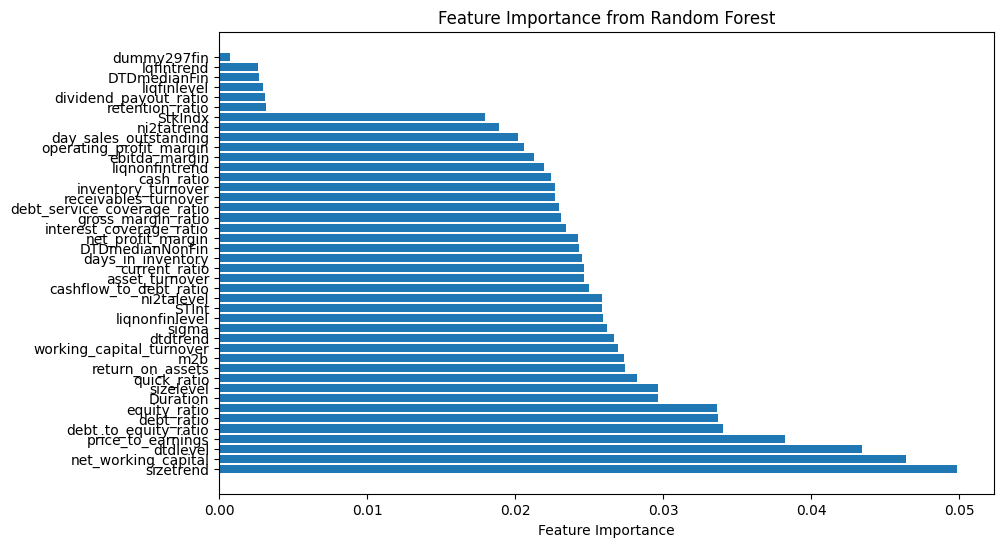

In [ ]:
X = df2.drop(['Default'], axis=1)
y = df2['Default']

# Fit a random forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

# Create a dataframe to show feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


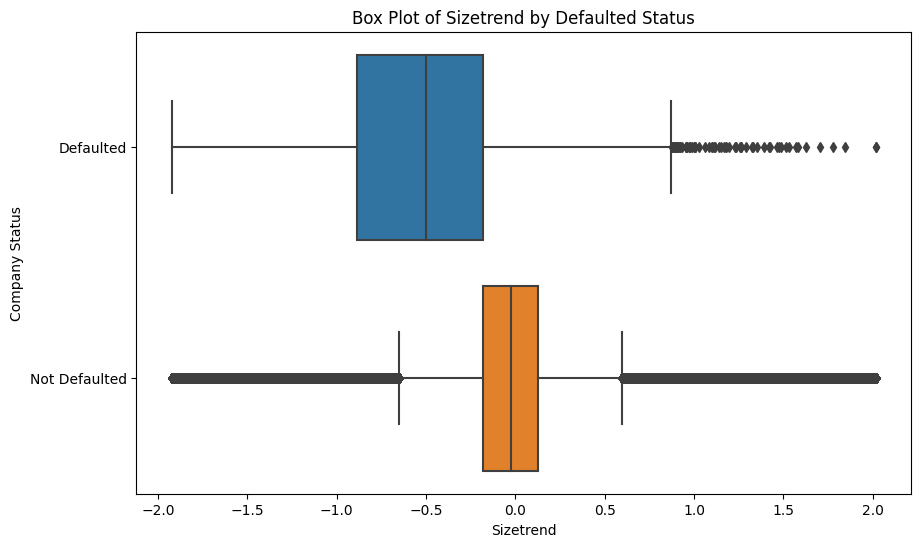

In [18]:
# Create separate dataframes for each group
defaulted_df = default_1_data[['sizetrend']]
not_defaulted_df = default_0_data[['sizetrend']]

# Create a box plot to compare 'Sizetrend' between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='sizetrend', y='group', data=pd.concat([defaulted_df.assign(group='Defaulted'), not_defaulted_df.assign(group='Not Defaulted')]))
plt.title('Box Plot of Sizetrend by Defaulted Status')
plt.xlabel('Sizetrend')
plt.ylabel('Company Status')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Sizetrend', data=pd.concat([default_1_data.assign(Group='Default 1'), default_0_data.assign(Group='Default 0')]))
plt.title('Violin Plot of Sizetrend by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Sizetrend')
plt.show()